<a href="https://colab.research.google.com/github/omar-omar-om/creditRisk/blob/main/CreditRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install catboost

# **Import libraries**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, auc
from itertools import product




# **Connecting to google drive**

In [55]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/credit_risk_dataset.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **What is this dataset about**

In [56]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<h3>Detailed Dataset Features Description</h3>
<ul>
    <li><strong>person_age</strong>: Represents the age of the borrower.</li>
    <li><strong>person_income</strong>: The annual income of the borrower.</li>
    <li><strong>person_home_ownership</strong>: The home ownership status of the borrower, categorized as:
        <ul>
            <li><strong>RENT</strong>: The borrower is renting their home.</li>
            <li><strong>OWN</strong>: The borrower owns their home outright, without any mortgage.</li>
            <li><strong>MORTGAGE</strong>: The borrower owns their home but has a mortgage.</li>
        </ul>
    </li>
    <li><strong>person_emp_length</strong>: The number of years the borrower has been employed.</li>
    <li><strong>loan_intent</strong>: The purpose of the loan, with possible values such as:
        <ul>
            <li><strong>PERSONAL</strong>: A loan taken out for personal use.</li>
            <li><strong>EDUCATION</strong>: A loan used to cover educational expenses.</li>
            <li><strong>MEDICAL</strong>: A loan specifically for medical or health-related expenses.</li>
            <li><strong>VENTURE</strong>: A loan intended for funding a business venture.</li>
            <li><strong>HOMEIMPROVEMENT</strong>: A loan used for home improvement projects.</li>
            <li><strong>DEBTCONSOLIDATION</strong>: A loan taken to consolidate multiple debts into a single loan.</li>
        </ul>
    </li>
    <li><strong>loan_grade</strong>: The grade assigned to the loan based on the assessed risk, explained as:
        <ul>
            <li><strong>A</strong>: Highest credit quality with the lowest risk.</li>
            <li><strong>B</strong>: Above average credit quality, relatively low risk.</li>
            <li><strong>C</strong>: Average credit quality, moderate risk.</li>
            <li><strong>D</strong>: Below average credit quality, higher risk.</li>
            <li><strong>E</strong>: Low credit quality, very high risk.</li>
            <li><strong>F</strong>: Very low credit quality, extremely high risk.</li>
            <li><strong>G</strong>: Lowest credit quality, indicative of the highest risk.</li>
        </ul>
    </li>
    <li><strong>loan_amnt</strong>: The amount of the loan requested by the borrower.</li>
    <li><strong>loan_int_rate</strong>: The interest rate of the loan.</li>
    <li><strong>loan_status</strong>: Indicates whether the loan has defaulted or not, with '1' for default and '0' for non-default.</li>
    <li><strong>loan_percent_income</strong>: The percentage of the borrower's income that the loan amount represents.</li>
    <li><strong>cb_person_default_on_file</strong>: Indicates whether the borrower has a history of default:
        <ul>
            <li><strong>Y</strong>: Yes, there is a history of default.</li>
            <li><strong>N</strong>: No, there is no history of default.</li>
        </ul>
    </li>
    <li><strong>cb_person_cred_hist_length</strong>: The number of years of credit history that the borrower has.</li>
</ul>


# **Exploratory data analysis**

In [57]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


**Initial insights**
- There are missing values in these columns:
 - person_emp_length
 - loan_int_rate
- There exists some outliers , specially in person_age.

## **Histograms**

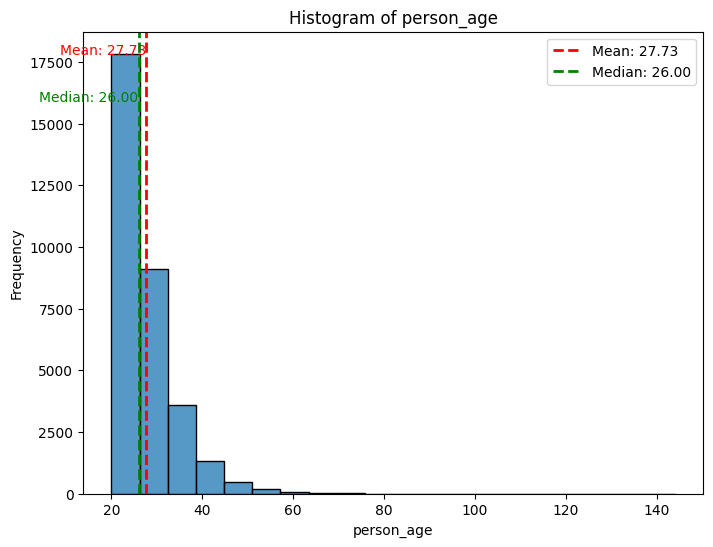

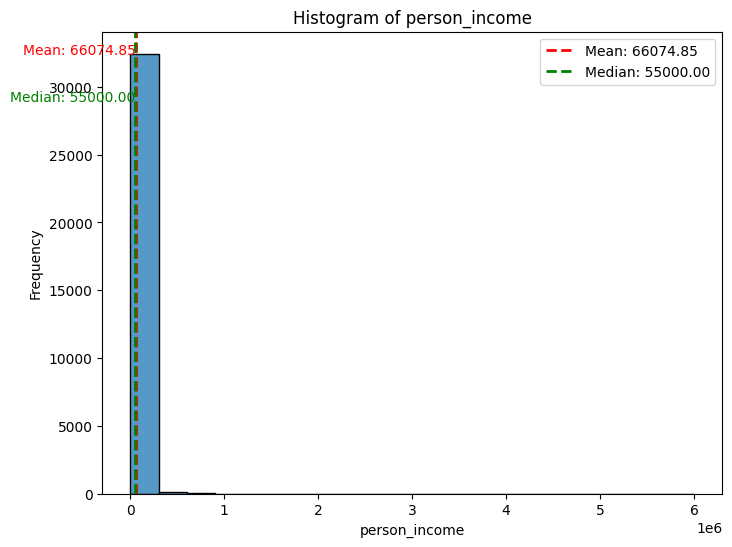

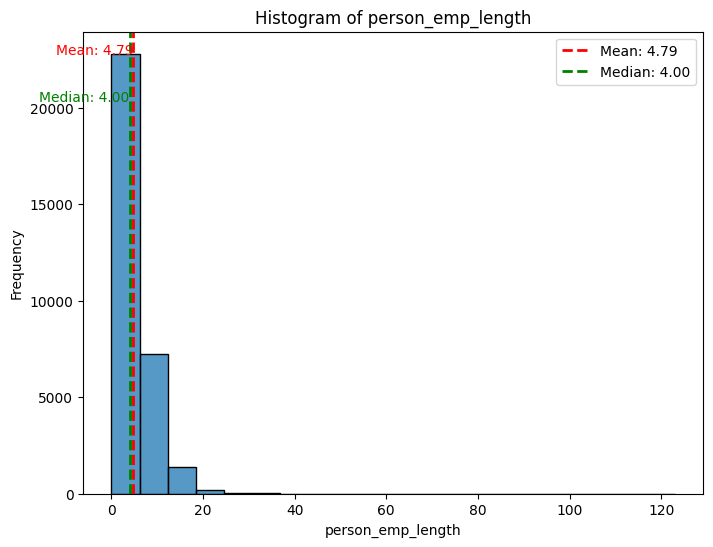

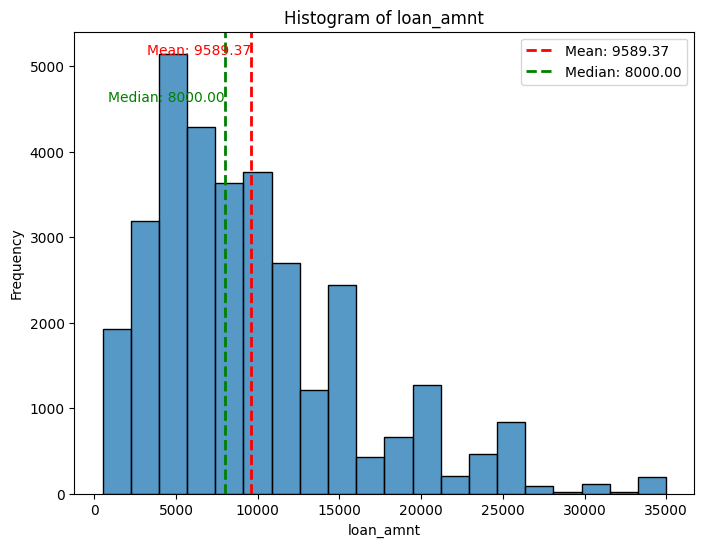

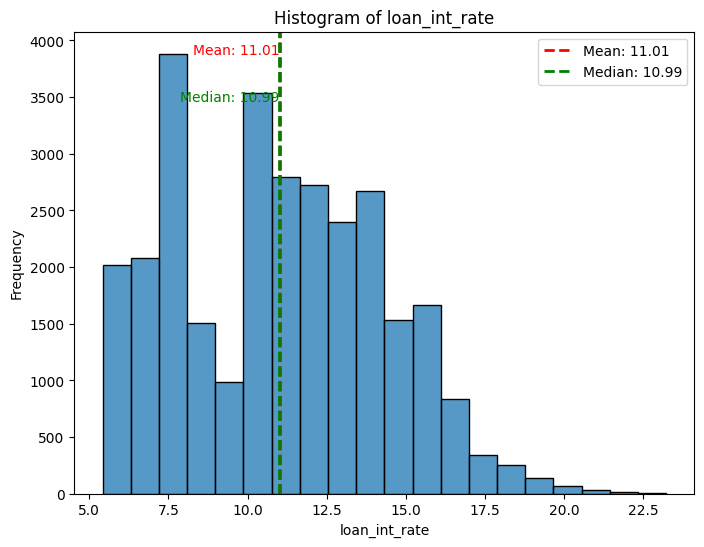

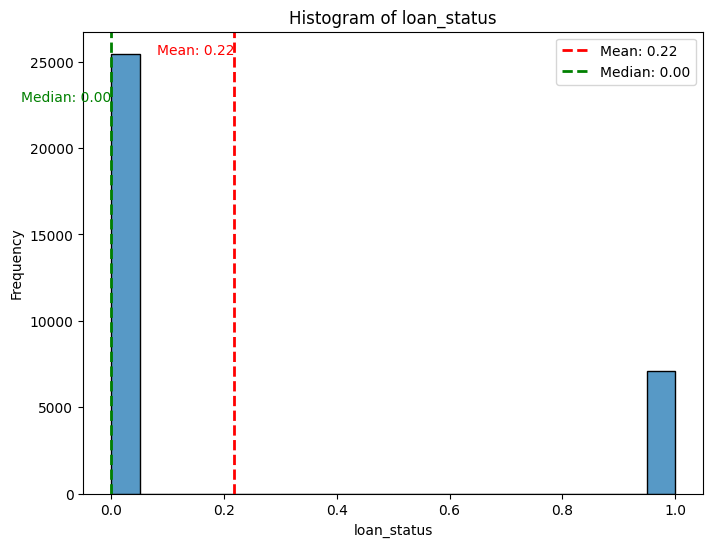

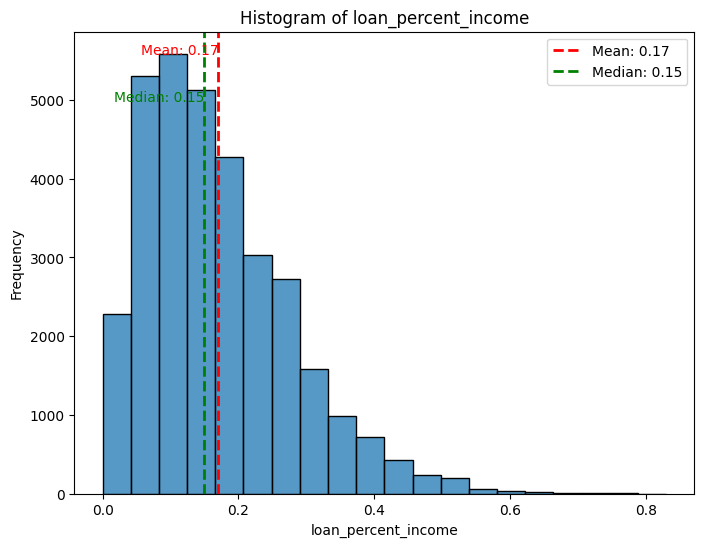

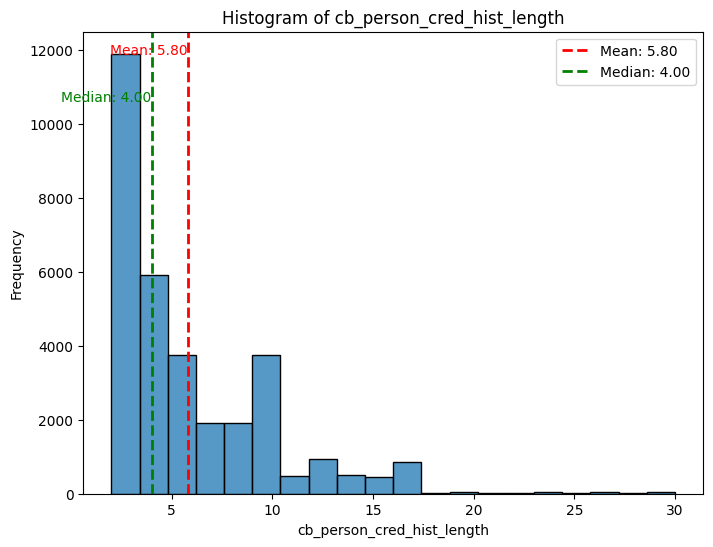

In [58]:
# Plot the histogram for each numerical column
for col in df.select_dtypes(include=['int64', 'float64']):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=20)
    plt.title(f'Histogram of {col}')

    # Calculate mean and median
    mean_value = df[col].mean()
    median_value = df[col].median()

    # Add vertical lines for mean and median
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean: {:.2f}'.format(mean_value))
    plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Median: {:.2f}'.format(median_value))

    # Label mean and median on the plot
    plt.text(mean_value, plt.gca().get_ylim()[1]*0.95, 'Mean: {:.2f}'.format(mean_value), color='red', ha='right')
    plt.text(median_value, plt.gca().get_ylim()[1]*0.85, 'Median: {:.2f}'.format(median_value), color='green', ha='right')

    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()



### Comprehensive insights from histogram analysis
<ul>
    <li><strong>Person Age</strong>: The distribution suggests a concentration of ages between 20 to 40 years, with outliers in higher age groups. The mean and median are relatively close, indicating a symmetric but slightly right-skewed distribution due to older age outliers.</li>
    <li><strong>Person Income</strong>: Exhibits a right-skewed distribution with a significant gap between the mean and median, indicating the presence of high-income outliers.</li>
    <li><strong>Person Employment Length</strong>: Mainly concentrated at lower values with extreme values suggesting long-term employment. This distribution is right-skewed.</li>
    <li><strong>Loan Amount</strong>: Shows a right-skewed distribution with most loans being of lower amounts, and a few high-value loans skewing the mean above the median.</li>
    <li><strong>Loan Interest Rate</strong>: The distribution is moderately right-skewed with the mean slightly higher than the median, suggesting variability in the rates with some higher rates present.</li>
    <li><strong>Loan Percent Income</strong>: This metric is also right-skewed, indicating that most loans constitute a smaller percentage of borrowers' incomes, with a few exceptions where loans represent a larger share.</li>
    <li><strong>Credit History Length</strong>: Shows that while most individuals have shorter credit histories, there is a tail extending towards longer histories. The distribution is right-skewed, suggesting that a smaller number of individuals have a long credit history.</li>
</ul>
<p>These distributions indicate varied skewness across the financial attributes of borrowers, with most distributions showing a right skew. Income, loan amount, and credit history lengths particularly highlight the presence of outliers which may significantly affect the mean.</p>


## **Barplots**

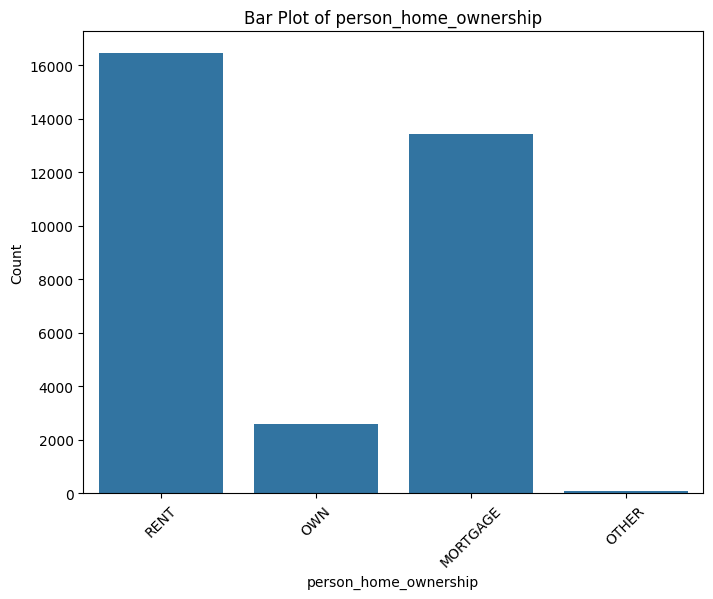

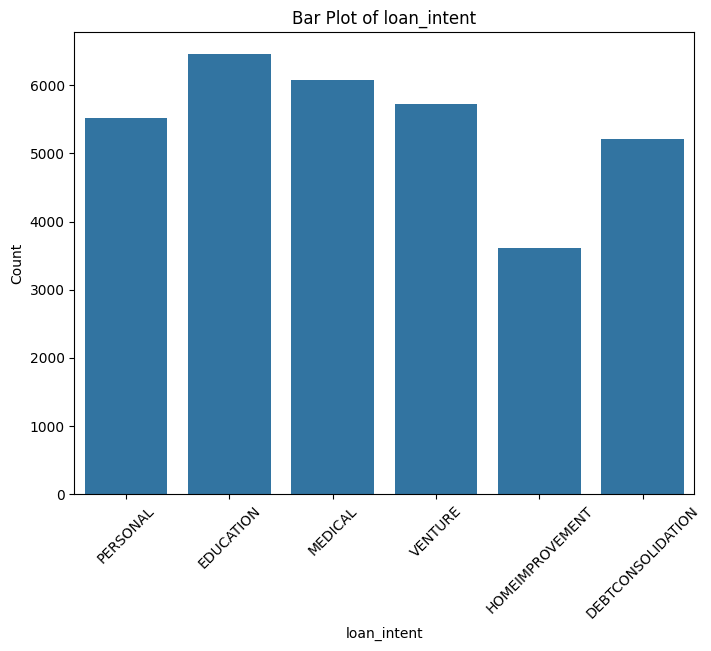

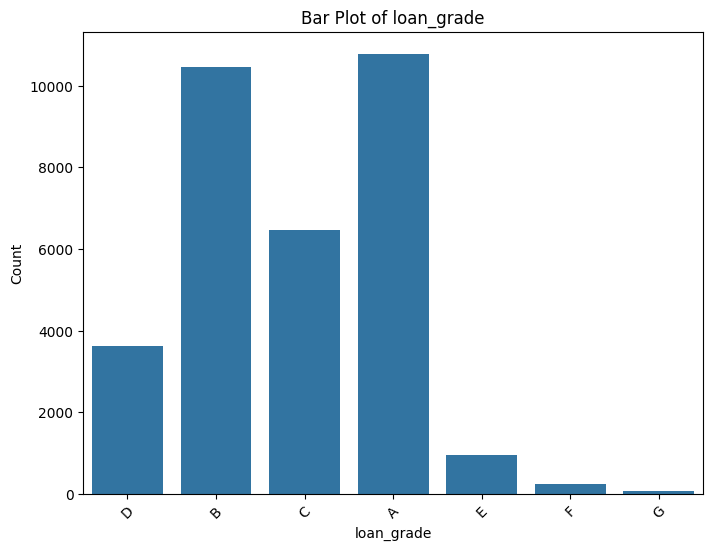

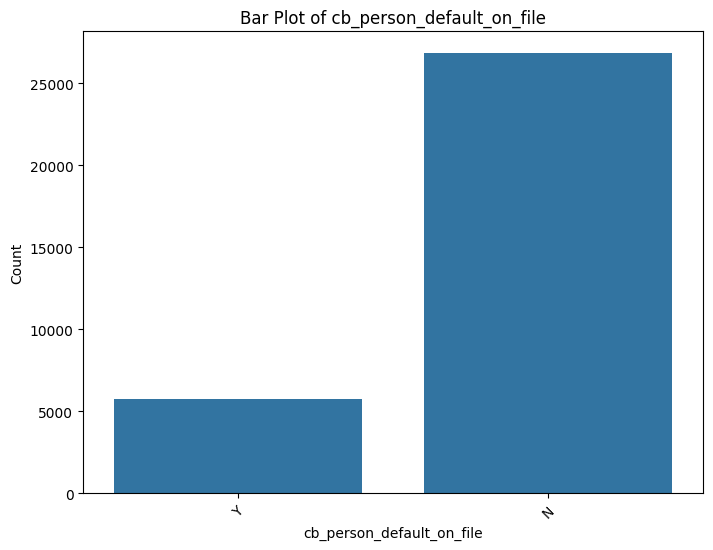

In [59]:
for col in df.select_dtypes(include=['object']):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


### Comprehensive insights from barplot analysis

1. Home Ownership
  - **Rent vs. Mortgage**: The two most common statuses are 'RENT' and 'MORTGAGE'. Fewer people own their homes right ('OWN'), and very few are categorized as 'OTHER'. This could indicate a younger demographic or one that is less financially established or maybe something that is unknown.

2. Loan Intent
  - **Common Purposes**: Loans for all types are close to each other indicating  variety on what people take loans for.

3. Loan Grade
  - **Popular Grades**: The most common loan grades are A,B,and C in that order. This indicates a low-moderate level of risk that most borrowers represent, with fewer borrowers in the high-risk categories.

4. Default on File
  - **Majority with 'N'**: Most individuals in the dataset do not have a default history, as indicated by the high count for 'N' compared to 'Y'. This suggests a generally good credit behavior among the majority of borrowers.


## **Correlation matrix**

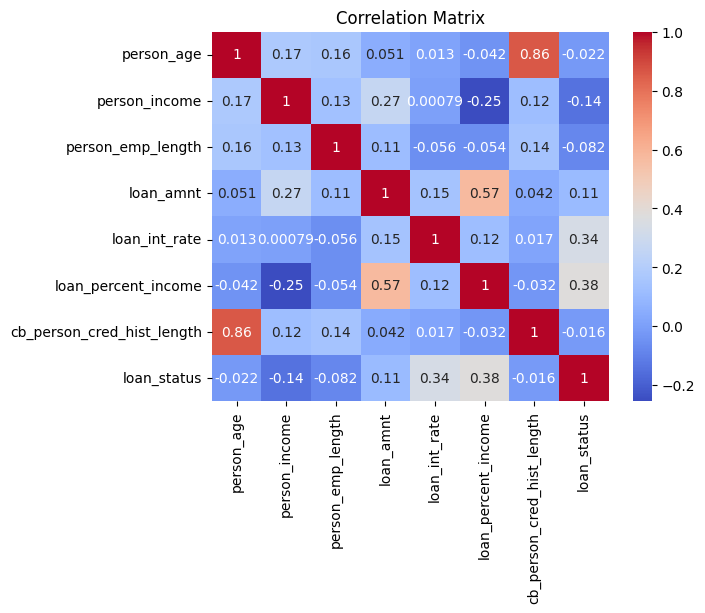

In [60]:
# Correlation
numeric_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']
corr_matrix = df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Comprehensive insights from correlation matrix analysis
1. Age and Credit History Length:

  - There is a strong positive correlation (0.86) between person_age and cb_person_cred_hist_length. This implies that as a person's age increases, so does the length of their credit history, which is expected since older individuals have had more time to build a credit history.
2. Loan Amount and Income:
  - loan_amnt and person_income show a low positive correlation (0.27). This suggests that individuals with higher incomes tend to take out larger loans, possibly due to higher creditworthiness or the ability to repay larger amounts.
3. Loan Amount and Loan Percentage of Income:

  - There is a moderate positive correlation (0.57) between loan_amnt and loan_percent_income. This indicates that as the loan amount increases, it constitutes a higher percentage of the borrower’s income, which might imply higher financial stress or risk for larger loans relative to the borrower's income.
4. Interest Rate and Loan Status:
  - The correlation between loan_int_rate and loan_status is moderately positive (0.34). This could suggest that higher interest rates are associated with a greater likelihood of loan default.
5. Loan Percentage of Income and Loan Status:
  - loan_percent_income and loan_status also have a positive correlation (0.38). Loans that take up a larger portion of a borrower's income may be riskier, as they could lead to difficulties in managing repayments, especially if the borrower's financial situation changes.

# **Data preprocessing**

## **Cleaning**

#### **Nan values**

In [61]:
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


##### **Aprroach 1**

In [62]:
df_nan_removed = df.copy()
df_nan_removed.dropna(inplace=True)
df_nan_removed.shape


(28638, 12)

##### **Approach 2**

In [63]:
df_imputed = df.copy()
df_imputed['person_emp_length'].fillna(df_imputed['person_emp_length'].median(), inplace=True)
df_imputed['loan_int_rate'].fillna(df_imputed['loan_int_rate'].median(), inplace=True)


<ipython-input-63-5a9c61ef7fcf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed['person_emp_length'].fillna(df_imputed['person_emp_length'].median(), inplace=True)
<ipython-input-63-5a9c61ef7fcf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

Given that the histograms indicate that these two columns are right-skewed, we are using the median for imputation. The median provides a more representative measure of central tendency for this data distribution than the mean.

 **Everything from now and on that will change the df will be done on df_nan_removed and df_imputed.**

### **Duplicates**

In [64]:
# check for duplicates in all df
print(df.duplicated().sum())
print(df_nan_removed.duplicated().sum())
print(df_imputed.duplicated().sum())

165
137
165


Remove duplicates from both DF



In [65]:
df_nan_removed.drop_duplicates(inplace=True)
df_imputed.drop_duplicates(inplace=True)

Validation

In [66]:
print(df_nan_removed.duplicated().sum())
print(df_imputed.duplicated().sum())

0
0


### **Outliers**

##### **Age and employment length**

In [67]:
# According to 'guinness world records' the maximum age recorded is 116 ,however in dataset we even have above 140.
# According to 'Worlddata.info' average age could be between 78 to 83 , hence i will remove any age above 80.
df_nan_removed = df_nan_removed[df_nan_removed['person_age'] <= 80]
df_imputed = df_imputed[df_imputed['person_age'] <= 80]

# since i will cut ages to 80 , employment length will be cutted down to 60
df_nan_removed = df_nan_removed[df_nan_removed['person_emp_length'] <= 60]
df_imputed = df_imputed[df_imputed['person_emp_length'] <= 60]






#### **Validation**

In [68]:

# Calculate the maximum possible credit history length for each person
df_nan_removed['max_possible_cred_hist'] = df_nan_removed['person_age'] - 16

# Identify rows where the credit history length is greater than the possible credit history
anomalies = df_nan_removed[df_nan_removed['cb_person_cred_hist_length'] > df_nan_removed['max_possible_cred_hist']]

# Display the anomalies
print(anomalies[['person_age', 'cb_person_cred_hist_length', 'max_possible_cred_hist']])

#------------------------

# Calculate the maximum possible credit history length for each person
df_imputed['max_possible_cred_hist'] = df_imputed['person_age'] - 16

# Identify rows where the credit history length is greater than the possible credit history
anomalies = df_imputed[df_imputed['cb_person_cred_hist_length'] > df_imputed['max_possible_cred_hist']]

# Display the anomalies
print(anomalies[['person_age', 'cb_person_cred_hist_length', 'max_possible_cred_hist']])


Empty DataFrame
Columns: [person_age, cb_person_cred_hist_length, max_possible_cred_hist]
Index: []
Empty DataFrame
Columns: [person_age, cb_person_cred_hist_length, max_possible_cred_hist]
Index: []


# **Feature Engineering**

## **income**

- Very Low: Below the 20th percentile
- Low: 20th to 40th percentile
- Medium: 40th to 60th percentile
- High: 60th to 80th percentile
- Very High: Above the 80th percentile

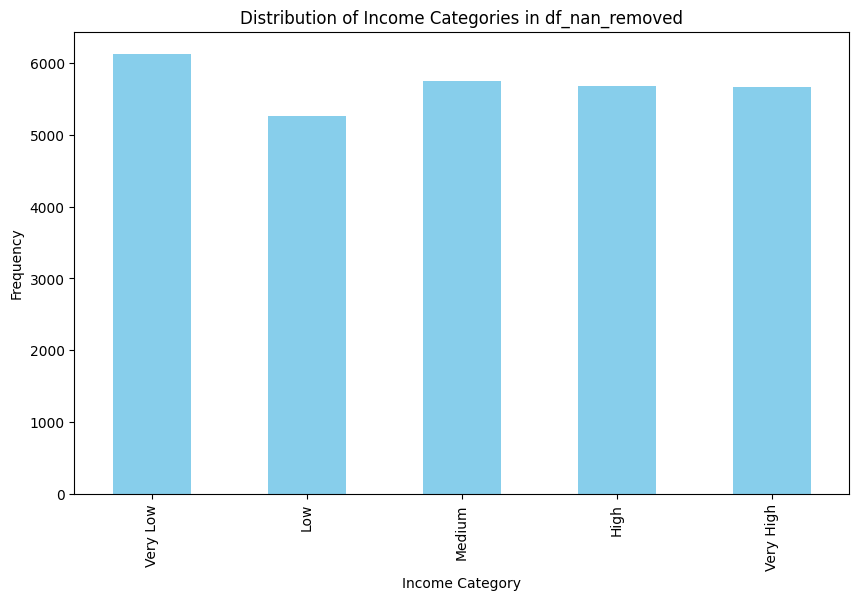

In [69]:
# Calculating percentiles for the 'person_income' in the df_nan_removed DataFrame
percentiles = df_nan_removed['person_income'].quantile([0.2, 0.4, 0.6, 0.8]).values

# Categorizing 'person_income' into 'Very Low', 'Low', 'Medium', 'High', 'Very High'
df_nan_removed['income_category'] = pd.cut(df_nan_removed['person_income'],
                               bins=[df_nan_removed['person_income'].min(), *percentiles, df_nan_removed['person_income'].max()],
                               labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'],
                               include_lowest=True)


# Plotting the distribution of income categories
plt.figure(figsize=(10, 6))
df_nan_removed['income_category'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Income Categories in df_nan_removed')
plt.xlabel('Income Category')
plt.ylabel('Frequency')
plt.show()


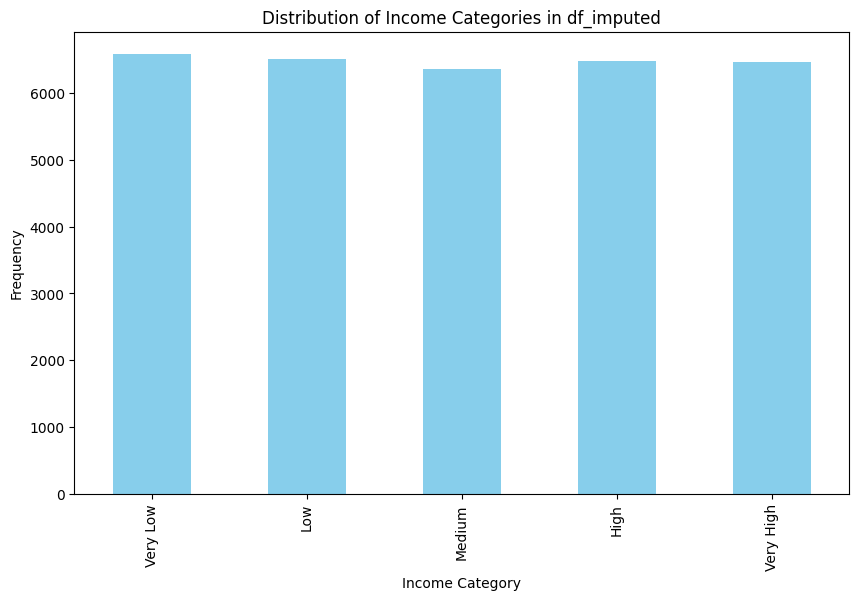

In [70]:
# Calculating percentiles for the 'person_income' in the df_imputed DataFrame
percentiles = df_imputed['person_income'].quantile([0.2, 0.4, 0.6, 0.8]).values

# Categorizing 'person_income' into 'Very Low', 'Low', 'Medium', 'High', 'Very High'
df_imputed['income_category'] = pd.cut(df_imputed['person_income'],
                               bins=[df_imputed['person_income'].min(), *percentiles, df_imputed['person_income'].max()],
                               labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'],
                               include_lowest=True)

# Plotting the distribution of income categories
plt.figure(figsize=(10, 6))
df_imputed['income_category'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Income Categories in df_imputed')
plt.xlabel('Income Category')
plt.ylabel('Frequency')
plt.show()


## **Loan percentage of the income**

In [71]:
# Creating 'loan_percentage_of_income' by dividing 'loan_amnt' by 'person_income' and rounding to 2 decimal places
df_nan_removed['loan_percentage_of_income'] = (df_nan_removed['loan_amnt'] / df_nan_removed['person_income']).round(2)
# Creating 'loan_percentage_of_income' by dividing 'loan_amnt' by 'person_income' and rounding to 2 decimal places
df_imputed['loan_percentage_of_income'] = (df_imputed['loan_amnt'] / df_imputed['person_income']).round(2)



This step is crucial to ensure the column is calculated accurately. Although there is another column that performs a similar function, this additional validation helps confirm the integrity of our data.

In [72]:
df_imputed.head()
print(df_imputed.shape)


(32407, 15)


In [73]:
df_nan_removed.head()
print(df_nan_removed.shape)

(28494, 15)


## **Encoding**

### **Label encoding**

In [74]:
# Custom mapping for loan grades
loan_grade_mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6
}

# Custom mapping for income categories
income_category_mapping = {
    'Very Low': 0,   # Lowest income category
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4   # Highest income category
}
# Apply the custom mapping to loan_grade and income_category for df_nan_removed
df_nan_removed['loan_grade'] = df_nan_removed['loan_grade'].map(loan_grade_mapping)
df_nan_removed['income_category'] = df_nan_removed['income_category'].map(income_category_mapping)

# Apply the custom mapping to loan_grade and income_category for df_imputed
df_imputed['loan_grade'] = df_imputed['loan_grade'].map(loan_grade_mapping)
df_imputed['income_category'] = df_imputed['income_category'].map(income_category_mapping)



In [75]:
df_imputed.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,max_possible_cred_hist,income_category,loan_percentage_of_income
1,21,9600,OWN,5.0,EDUCATION,1,1000,11.14,0,0.10,N,2,5,0,0.10
2,25,9600,MORTGAGE,1.0,MEDICAL,2,5500,12.87,1,0.57,N,3,9,0,0.57
3,23,65500,RENT,4.0,MEDICAL,2,35000,15.23,1,0.53,N,2,7,3,0.53
4,24,54400,RENT,8.0,MEDICAL,2,35000,14.27,1,0.55,Y,4,8,2,0.64
5,21,9900,OWN,2.0,VENTURE,0,2500,7.14,1,0.25,N,2,5,0,0.25


### **One-hot-encoding**

In [76]:
df_nan_removed = pd.get_dummies(df_nan_removed, columns=['person_home_ownership', 'loan_intent','cb_person_default_on_file'],dtype=int)
df_imputed = pd.get_dummies(df_imputed, columns=['person_home_ownership', 'loan_intent','cb_person_default_on_file'], dtype=int)



In [77]:
df_nan_removed.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,max_possible_cred_hist,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1,1000,11.14,0,0.10,2,5,...,1,0,0,1,0,0,0,0,1,0
2,25,9600,1.0,2,5500,12.87,1,0.57,3,9,...,0,0,0,0,0,1,0,0,1,0
3,23,65500,4.0,2,35000,15.23,1,0.53,2,7,...,0,1,0,0,0,1,0,0,1,0
4,24,54400,8.0,2,35000,14.27,1,0.55,4,8,...,0,1,0,0,0,1,0,0,0,1
5,21,9900,2.0,0,2500,7.14,1,0.25,2,5,...,1,0,0,0,0,0,0,1,1,0


## **Dropping columns**

In [78]:
# remove unnecessary columns
df_nan_removed.drop(columns=['loan_percent_income','person_income','max_possible_cred_hist',], inplace=True)
df_imputed.drop(columns=['loan_percent_income','person_income','max_possible_cred_hist'], inplace=True)

In [79]:
# To make sure both got same number of features
print(df_nan_removed.shape)
print(df_imputed.shape)

(28494, 21)
(32407, 21)


In [80]:
df_imputed.head()

,person_age,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_cred_hist_length,income_category,loan_percentage_of_income,person_home_ownership_MORTGAGE,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,5.0,1,1000,11.14,0,2,0,0.10,0,...,1,0,0,1,0,0,0,0,1,0
2,25,1.0,2,5500,12.87,1,3,0,0.57,1,...,0,0,0,0,0,1,0,0,1,0
3,23,4.0,2,35000,15.23,1,2,3,0.53,0,...,0,1,0,0,0,1,0,0,1,0
4,24,8.0,2,35000,14.27,1,4,2,0.64,0,...,0,1,0,0,0,1,0,0,0,1
5,21,2.0,0,2500,7.14,1,2,0,0.25,0,...,1,0,0,0,0,0,0,1,1,0


## **Validation**

This step is important to ensure that both target groups are well presented in the df and there is no need for up or down sampling.

In [81]:
# Get the percentage of each category in the 'loan_status' column for df_nan_removed
print(df_nan_removed['loan_status'].value_counts(normalize=True) * 100)

# Get the percentage of each category in the 'loan_status' column for df_imputed
print(df_imputed['loan_status'].value_counts(normalize=True) * 100)


loan_status
0    78.286657
1    21.713343
Name: proportion, dtype: float64
loan_status
0    78.128182
1    21.871818
Name: proportion, dtype: float64


In [82]:
df_imputed['income_category'] = df_imputed['income_category'].astype('int64')
df_nan_removed['income_category'] = df_nan_removed['income_category'].astype('int64')


# **Machine learning**

## **Splitting data**

In [83]:
# Define the columns to be scaled
columns_to_scale = ['person_age', 'person_emp_length', 'loan_amnt']

# Initialize the StandardScaler instances
scaler_nan_removed = StandardScaler()
scaler_imputed = StandardScaler()

# Splitting df_nan_removed
X_nan_removed = df_nan_removed.drop('loan_status', axis=1)
y_nan_removed = df_nan_removed['loan_status']
X_train_nan_removed, X_test_nan_removed, y_train_nan_removed, y_test_nan_removed = train_test_split(
    X_nan_removed, y_nan_removed, test_size=0.2, random_state=42, stratify=y_nan_removed)

# Fit and transform the selected training data columns
X_train_scaled_nan_removed = X_train_nan_removed.copy()
X_train_scaled_nan_removed[columns_to_scale] = scaler_nan_removed.fit_transform(X_train_nan_removed[columns_to_scale])

# Transform the selected test data columns
X_test_scaled_nan_removed = X_test_nan_removed.copy()
X_test_scaled_nan_removed[columns_to_scale] = scaler_nan_removed.transform(X_test_nan_removed[columns_to_scale])

# Splitting df_imputed
X_imputed = df_imputed.drop('loan_status', axis=1)
y_imputed = df_imputed['loan_status']
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(
    X_imputed, y_imputed, test_size=0.2, random_state=42, stratify=y_imputed)

# Fit and transform the selected training data columns
X_train_scaled_imputed = X_train_imputed.copy()
X_train_scaled_imputed[columns_to_scale] = scaler_imputed.fit_transform(X_train_imputed[columns_to_scale])

# Transform the selected test data columns
X_test_scaled_imputed = X_test_imputed.copy()
X_test_scaled_imputed[columns_to_scale] = scaler_imputed.transform(X_test_imputed[columns_to_scale])



## **Tree classifiers**

In [84]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "CatBoost": CatBoostClassifier(verbose=0, random_seed=42),
    "LightGBM": LGBMClassifier(random_state=42)
}


In [85]:
def evaluate_classifiers(X_train, X_test, y_train, y_test, classifiers):
    results = {}
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        sensitivity = tp / (tp + fn)

        results[name] = {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1 Score": f1,
            "ROC AUC": roc_auc,
            "Specificity": specificity,
            "Sensitivity": sensitivity,
        }
    return results




### **Evaluation and results**

In [86]:

# Evaluating all models
evaluation_results_classifiers = {
    "NaN Removed ": evaluate_classifiers(X_train_nan_removed, X_test_nan_removed, y_train_nan_removed, y_test_nan_removed, classifiers),
    "Imputed ": evaluate_classifiers(X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed, classifiers)
}

# Preparing data for DataFrame construction
data_for_df = {}
for dataset, results in evaluation_results_classifiers.items():
    for model, metrics in results.items():
        for metric, value in metrics.items():
            data_for_df.setdefault((dataset, model, metric), []).append(value)

# Convert the structured data into a DataFrame
results_df_classifiers = pd.DataFrame.from_dict(data_for_df, orient='index', columns=['Value'])
results_df_classifiers.index = pd.MultiIndex.from_tuples(results_df_classifiers.index, names=['Dataset', 'Model', 'Metric'])
results_df_classifiers = results_df_classifiers.unstack(level=-1)  # This should spread metrics across columns
results_df_classifiers.columns = results_df_classifiers.columns.droplevel(0)  # Drop top level to clean up the DataFrame
results_df_classifiers = results_df_classifiers.T  # Transpose for better visualization
results_df_classifiers


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:47:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 4950, number of negative: 17845
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 22795, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217153 -> initscore=-1.282336
[LightGBM] [Info] Start training from score -1.282336


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:47:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 5670, number of negative: 20255
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 25925, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218708 -> initscore=-1.273213
[LightGBM] [Info] Start training from score -1.273213


Dataset      Imputed                                                   \
Model        CatBoost Decision Tree  LightGBM Random Forest   XGBoost   
Metric                                                                  
Accuracy     0.936748      0.890620  0.938445      0.931503  0.936285   
F1 Score     0.834544      0.755433  0.838918      0.819218  0.835393   
Precision    0.975472      0.739365  0.981114      0.969171  0.960587   
ROC AUC      0.934278      0.847995  0.934237      0.923940  0.931528   
Recall       0.729196      0.772214  0.732722      0.709450  0.739069   
Sensitivity  0.729196      0.772214  0.732722      0.709450  0.739069   
Specificity  0.994866      0.923776  0.996051      0.993681  0.991509   

Dataset     NaN Removed                                                   
Model           CatBoost Decision Tree  LightGBM Random Forest   XGBoost  
Metric                                                                    
Accuracy        0.939814      0.888752  0.939814      0.930690  0.936305  
F1 Score        0.841277      0.752344  0.841424      0.814641  0.834019  
Precision       0.983766      0.727891  0.982721      0.970917  0.960000  
ROC AUC         0.937241      0.848908  0.936854      0.927437  0.933994  
Recall          0.734842      0.778496  0.735651      0.701698  0.737268  
Sensitivity     0.734842      0.778496  0.735651      0.701698  0.737268  
Specificity     0.996638      0.919319  0.996414      0.994173  0.991484

 Model Performance Summary and Recommendation

This analysis compared the performance of several machine learning models on a credit risk dataset. Two data preprocessing approaches were used:

1. **NaN Removed:** Rows with missing values were removed.
2. **Imputed:** Missing values were imputed using the median.

The models evaluated were CatBoost, Decision Tree, LightGBM, Random Forest, and XGBoost.  Performance was measured using Accuracy, F1 Score, Precision, Recall, ROC AUC, Sensitivity, and Specificity.

Key Findings:

* **CatBoost** consistently outperformed other models across both preprocessing methods, achieving high accuracy, precision, and ROC AUC.
* **LightGBM and XGBoost** also performed well but were slightly behind CatBoost in overall performance.
* **Decision Tree** had the lowest performance among the models tested.
* The choice of preprocessing method (NaN Removed vs. Imputed) had a minimal impact on the performance of most models.

Recommendation:

**CatBoost**, with the **NaN Removed** preprocessing strategy, is the recommended model for this dataset. It offers the best overall performance and robustness, making it suitable for predicting credit risk.

**Justification:** CatBoost consistently achieved the highest scores across key metrics including accuracy, precision, and ROC AUC. While LightGBM and XGBoost were competitive, CatBoost's overall performance and ease of use make it a preferable choice.


## **Non tree classifiers**

### **KNN**

In [87]:


# KNN Model with Grid Search
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9,20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()

knn_grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=knn_param_grid,
    cv=3,  # 3-fold cross-validationh
    scoring='f1',  # Use F1
    verbose=1,
    n_jobs=-1
)

knn_grid_search.fit(X_train_scaled_nan_removed, y_train_nan_removed)

# Best KNN Model
best_knn_model = knn_grid_search.best_estimator_
print(f"KNN Best Parameters: {knn_grid_search.best_params_}")

# Evaluate KNN
y_knn_pred = best_knn_model.predict(X_test_scaled_nan_removed)

# Calculate Metrics for KNN
knn_accuracy = accuracy_score(y_test_nan_removed, y_knn_pred)
knn_precision = precision_score(y_test_nan_removed, y_knn_pred)
knn_recall = recall_score(y_test_nan_removed, y_knn_pred)
knn_f1 = f1_score(y_test_nan_removed, y_knn_pred)

print("\nKNN Best Metrics:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1-Score: {knn_f1}")



Fitting 3 folds for each of 20 candidates, totalling 60 fits
KNN Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

KNN Best Metrics:
Accuracy: 0.8638357606597649
Precision: 0.7581187010078387
Recall: 0.5472918350848828
F1-Score: 0.6356807511737089


## **Neural netwrok**

In [88]:
def create_model(input_dim):
    model = Sequential([
        Dense(256, input_dim=input_dim, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

### **Validation set**

In [89]:

# Split the scaled nan_removed dataset into new training and validation sets
X_train_final_nan_removed, X_val_nan_removed, y_train_final_nan_removed, y_val_nan_removed = train_test_split(
    X_train_scaled_nan_removed, y_train_nan_removed, test_size=0.2, random_state=42)

# Split the scaled imputed dataset into new training and validation sets
X_train_final_imputed, X_val_imputed, y_train_final_imputed, y_val_imputed = train_test_split(
    X_train_scaled_imputed, y_train_imputed, test_size=0.2, random_state=42)

### **Training and evaluating**

In [90]:

epochs = 30
batch_size = 32

# Creating models
input_dim_nan_removed = X_train_final_nan_removed.shape[1]
input_dim_imputed = X_train_final_imputed.shape[1]

model_nan_removed_scaled = create_model(input_dim_nan_removed)
model_imputed_scaled = create_model(input_dim_imputed)

# Training models with the validation sets
history_nan_removed_scaled = model_nan_removed_scaled.fit(
    X_train_final_nan_removed, y_train_final_nan_removed,
    epochs=epochs, batch_size=batch_size,
    validation_data=(X_val_nan_removed, y_val_nan_removed))

history_imputed_scaled = model_imputed_scaled.fit(
    X_train_final_imputed, y_train_final_imputed,
    epochs=epochs, batch_size=batch_size,
    validation_data=(X_val_imputed, y_val_imputed))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8249 - loss: 0.4070 - val_accuracy: 0.8511 - val_loss: 0.3531
Epoch 2/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8669 - loss: 0.3372 - val_accuracy: 0.8739 - val_loss: 0.3264
Epoch 3/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8805 - loss: 0.3134 - val_accuracy: 0.8908 - val_loss: 0.2965
Epoch 4/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8908 - loss: 0.2942 - val_accuracy: 0.8952 - val_loss: 0.2922
Epoch 5/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8937 - loss: 0.2888 - val_accuracy: 0.8973 - val_loss: 0.2823
Epoch 6/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9010 - loss: 0.2727 - val_accuracy: 0.9006 - val_loss: 0.2735
Epoch 7/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9030 - loss: 0.2732 - val_accuracy: 0.8930 - val_loss: 0.2807
Epoch 8/30
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9024 - loss: 0.2686 - val_accuracy: 0.

In [91]:
def evaluate_model(model, X_test, y_test):
    # Making predictions
    y_pred_prob = model.predict(X_test)
    y_pred = np.round(y_pred_prob)  # Thresholding probabilities to get binary classification

    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }



In [92]:
# Evaluating all models
evaluation_results = {
    "NN NaN Removed Scaled": evaluate_model(model_nan_removed_scaled, X_test_scaled_nan_removed, y_test_nan_removed),
    "NN Imputed Scaled": evaluate_model(model_imputed_scaled, X_test_scaled_imputed, y_test_imputed)
}


179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### **Results**

In [93]:

# Converting results into a DataFrame for better visualization
results_df = pd.DataFrame(evaluation_results).T  # Transpose to have models as rows
print(results_df)


                       Accuracy  Precision    Recall  F1 Score
NN NaN Removed Scaled  0.918582   0.938706  0.668553  0.780925
NN Imputed Scaled      0.911293   0.850958  0.720733  0.780451


# **Champion model hyperparameter tuning**

## **CatBoost**

In [94]:
# Define a function to evaluate the model
def tuning_eval(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")




In [95]:
# Baseline Model
print("\n--- Baseline Model (Default Parameters) ---")
catboost_baseline = CatBoostClassifier(verbose=0, random_seed=42)
catboost_baseline.fit(X_train_nan_removed, y_train_nan_removed)
print("Baseline Model Performance:")
tuning_eval(catboost_baseline, X_test_nan_removed, y_test_nan_removed)


--- Baseline Model (Default Parameters) ---
Baseline Model Performance:
Accuracy: 0.9398
Recall: 0.7348
Precision: 0.9838
F1 Score: 0.8413
ROC AUC: 0.9372


In [96]:

# Early Stopping
print("\n--- Enable Early Stopping ---")
catboost_early = CatBoostClassifier(verbose=0, random_seed=42, iterations=2000, early_stopping_rounds=100)
catboost_early.fit(X_train_nan_removed, y_train_nan_removed)
print("Performance with Early Stopping:")
tuning_eval(catboost_early, X_test_nan_removed, y_test_nan_removed)


--- Enable Early Stopping ---
Performance with Early Stopping:
Accuracy: 0.9398
Recall: 0.7348
Precision: 0.9838
F1 Score: 0.8413
ROC AUC: 0.9377


In [97]:
#  Iterations and Learning Rate
print("\n--- Adjusted Iterations and Learning Rate ---")
catboost_tuned = CatBoostClassifier(verbose=0, random_seed=42, iterations=1500, learning_rate=0.03)
catboost_tuned.fit(X_train_nan_removed, y_train_nan_removed)
print("Performance with Adjusted Iterations and Learning Rate:")
tuning_eval(catboost_tuned, X_test_nan_removed, y_test_nan_removed)


--- Adjusted Iterations and Learning Rate ---
Performance with Adjusted Iterations and Learning Rate:
Accuracy: 0.9396
Recall: 0.7348
Precision: 0.9827
F1 Score: 0.8409
ROC AUC: 0.9378


In [98]:
# Best Combined Configuration
print("\n--- Best Combined Configuration (Early Stopping + Tuned Parameters) ---")
catboost_combined = CatBoostClassifier(verbose=0, random_seed=42, iterations=2000, learning_rate=0.03, early_stopping_rounds=100)
catboost_combined.fit(X_train_nan_removed, y_train_nan_removed)
print("Performance with Combined Configuration:")
tuning_eval(catboost_combined, X_test_nan_removed, y_test_nan_removed)


--- Best Combined Configuration (Early Stopping + Tuned Parameters) ---
Performance with Combined Configuration:
Accuracy: 0.9405
Recall: 0.7413
Precision: 0.9797
F1 Score: 0.8440
ROC AUC: 0.9373


### **Visualization**

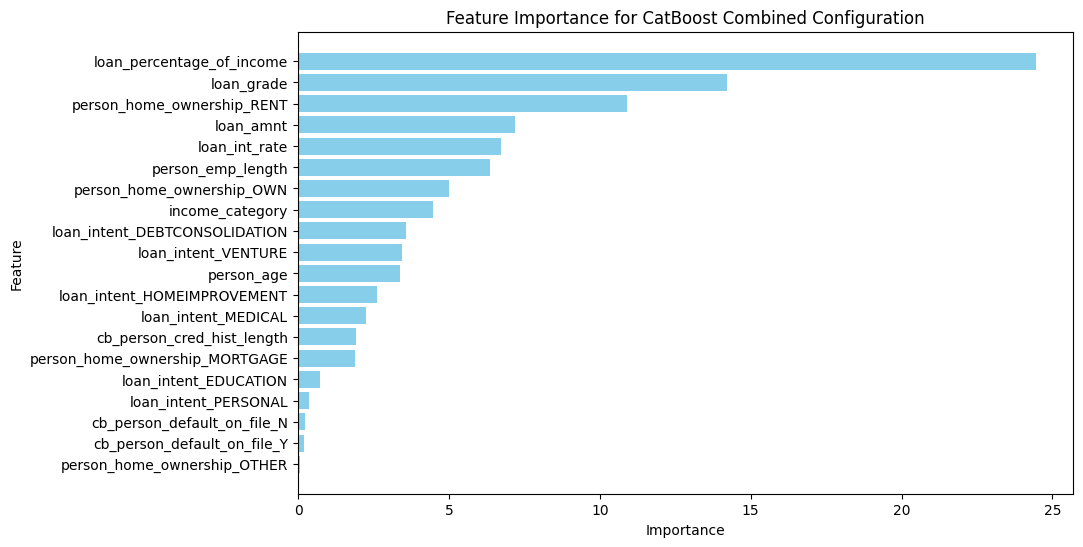

In [99]:


# Get feature importances
feature_importances = catboost_combined.get_feature_importance()
feature_names = X_train_nan_removed.columns if hasattr(X_train_nan_removed, 'columns') else [f"Feature {i}" for i in range(X_train_nan_removed.shape[1])]

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for CatBoost Combined Configuration')
plt.gca().invert_yaxis()  # Reverse the order for a better look
plt.show()



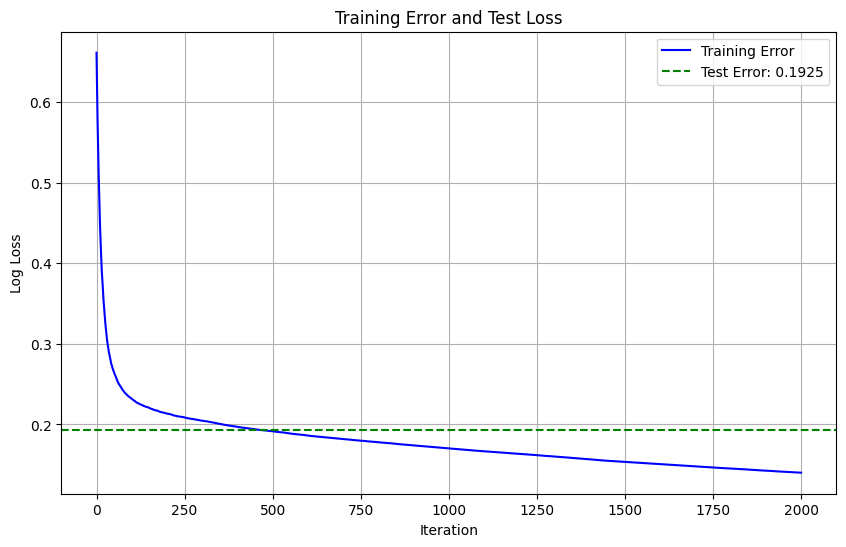

In [100]:
# Retrieve the evaluation results
eval_results = catboost_combined.evals_result_

# Extract the training error (Log Loss)
train_error = eval_results['learn']['Logloss']

# Calculate the Test Loss (Log Loss)
y_test_proba = catboost_combined.predict_proba(X_test_nan_removed)
test_loss = log_loss(y_test_nan_removed, y_test_proba)

# Plot Training Error and Test Loss
plt.figure(figsize=(10, 6))
plt.plot(train_error, label='Training Error', color='blue')
plt.axhline(y=test_loss, color='green', linestyle='--', label=f'Test Error: {test_loss:.4f}')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Training Error and Test Loss')
plt.legend()
plt.grid()
plt.show()



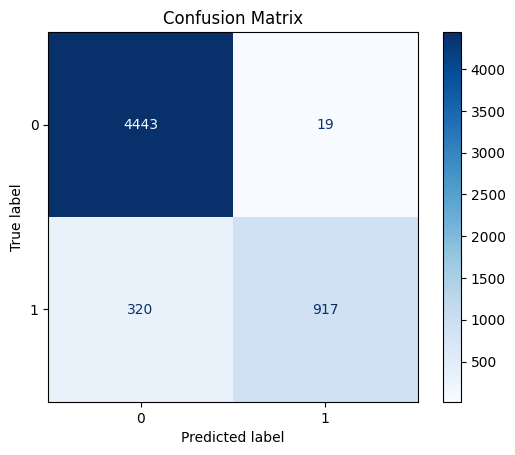

In [101]:
y_pred = catboost_combined.predict(X_test_nan_removed)

cm = confusion_matrix(y_test_nan_removed, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost_combined.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


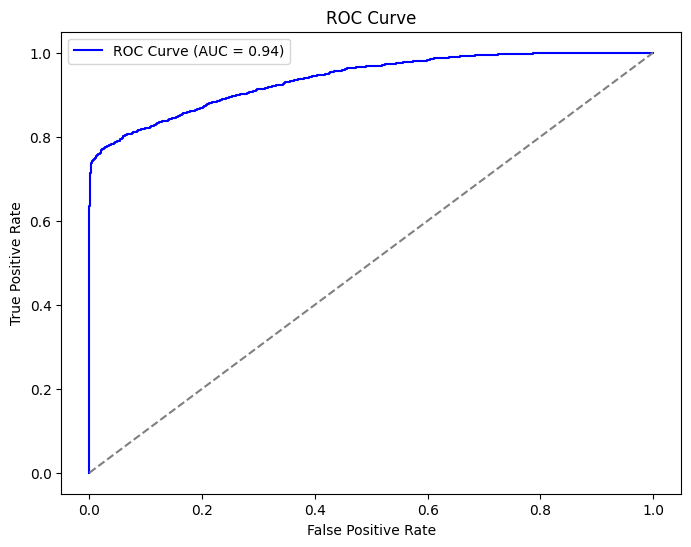

In [102]:
# Compute ROC curve and AUC
y_pred_proba = catboost_combined.predict_proba(X_test_nan_removed)[:, 1]  # Probability scores
fpr, tpr, thresholds = roc_curve(y_test_nan_removed, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guess
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# **What if imbalance is an issue?**

In [103]:
# Create a copy of the original DataFrame
df_smote_ready = df_nan_removed.copy()

# Separate features and target variable
X_features_smote = df_smote_ready.drop(columns=['loan_status'])
y_target_smote = df_smote_ready['loan_status']

# Split the original dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_features_smote, y_target_smote, test_size=0.2, random_state=42
)

# Apply SMOTE only on the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# The test set remains unchanged
print("Class distribution in y_train_smote (after SMOTE):")
print(y_train_smote.value_counts())

print("Class distribution in y_test (unchanged):")
print(y_test.value_counts())


Class distribution in y_train_smote (after SMOTE):
loan_status
0    17821
1    17821
Name: count, dtype: int64
Class distribution in y_test (unchanged):
loan_status
0    4486
1    1213
Name: count, dtype: int64


In [104]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'iterations': [1000,2000],
    'learning_rate': [0.01, 0.03],
    'depth': [6, 10],
    'early_stopping_rounds': [50, 100]
}

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(
    verbose=0,
    random_seed=42
)

# Define the F1 scorer
f1_scorer = make_scorer(f1_score, average='binary', pos_label=1)  # For binary classification

# Split the original dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_features_smote, y_target_smote, test_size=0.2, random_state=42
)

# Apply SMOTE only on the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Use the F1 scorer in GridSearchCV
grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=2,
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Perform the grid search on the training data after SMOTE
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model on the original test set
y_pred_best = best_model.predict(X_test)

# Evaluate the model's performance using accuracy, recall, precision, and F1-score
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# Output the results
{
    "Best Parameters": best_params,
    "Accuracy": accuracy_best,
    "Precision": precision_best,
    "Recall": recall_best,
    "F1 Score": f1_best
}


Fitting 2 folds for each of 16 candidates, totalling 32 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'Best Parameters': {'depth': 10,
  'early_stopping_rounds': 50,
  'iterations': 2000,
  'learning_rate': 0.01},
 'Accuracy': 0.9327952272328479,
 'Precision': 0.9600886917960089,
 'Recall': 0.7139323990107173,
 'F1 Score': 0.8189125295508274}

well.... seems like imbalance isnt really an issue